In [ ]:
pip install pymysql pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
# Step 1: Install MySQL Server
!apt-get update
!apt-get install -y mysql-server

# Step 2: Start the MySQL service
!service mysql start

# Step 3: Set up a sample MySQL database and user
!mysql -e "CREATE DATABASE colab_db;"  # Create a new database named 'colab_db'
!mysql -e "CREATE USER 'colab_user'@'localhost' IDENTIFIED BY 'password';"  # Create a new user
!mysql -e "GRANT ALL PRIVILEGES ON colab_db.* TO 'colab_user'@'localhost';"  # Grant all privileges to the user
!mysql -e "FLUSH PRIVILEGES;"  # Refresh privileges


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Get:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,255 kB]
Get:13 http://archive.ubuntu.com/u

In [2]:
!pip install pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import sqlite3

df = pd.read_csv('Churn Modeling.csv')

conn = sqlite3.connect('churn_modeling.db')

df.to_sql('users', conn, if_exists='replace', index=False)

print("Data saved to SQLite database successfully!")

cursor = conn.cursor()
cursor.execute("SELECT * FROM users LIMIT 5")
rows = cursor.fetchall()
for row in rows:
    print(row)

conn.close()


Data saved to SQLite database successfully!
(1, 15634602, 'Hargrave', 619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88, 1)
(2, 15647311, 'Hill', 608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58, 0)
(3, 15619304, 'Onio', 502, 'France', 'Female', 42, 8, 159660.8, 3, 1, 0, 113931.57, 1)
(4, 15701354, 'Boni', 699, 'France', 'Female', 39, 1, 0.0, 2, 0, 0, 93826.63, 0)
(5, 15737888, 'Mitchell', 850, 'Spain', 'Female', 43, 2, 125510.82, 1, 1, 1, 79084.1, 0)


# Hands On Activity! SQL in Python!!

In [ ]:
import pandas as pd

df = pd.read_csv('Churn Modeling.csv')

X = df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts']]

y = df['Exited']  

print(X.head())
print(y.head())


   CreditScore  Age    Balance  EstimatedSalary  Tenure  NumOfProducts
0          619   42       0.00        101348.88       2              1
1          608   41   83807.86        112542.58       1              1
2          502   42  159660.80        113931.57       8              3
3          699   39       0.00         93826.63       1              2
4          850   43  125510.82         79084.10       2              1
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(6,)),
    layers.Dense(100, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 100)            │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,789 (38.24 KB)

 Trainable params: 9,789 (38.24 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7713 - loss: 0.5225 - val_accuracy: 0.8188 - val_loss: 0.3949
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8252 - loss: 0.4020 - val_accuracy: 0.8238 - val_loss: 0.3884
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8266 - loss: 0.3874 - val_accuracy: 0.8369 - val_loss: 0.3818
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8370 - loss: 0.3729 - val_accuracy: 0.8381 - val_loss: 0.3764
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8451 - loss: 0.3627 - val_accuracy: 0.8381 - val_loss: 0.3780
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8491 - loss: 0.3511 - val_accuracy: 0.8363 - val_loss: 0.3769
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8453 - loss: 0.3605 - val_accuracy: 0.8331 - val_loss: 0.3812
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8440 - loss: 0.3557 - val_accuracy: 0.

In [19]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8366 - loss: 0.3950

Test Loss (MSE): 0.3834
Test MAE: 0.8430


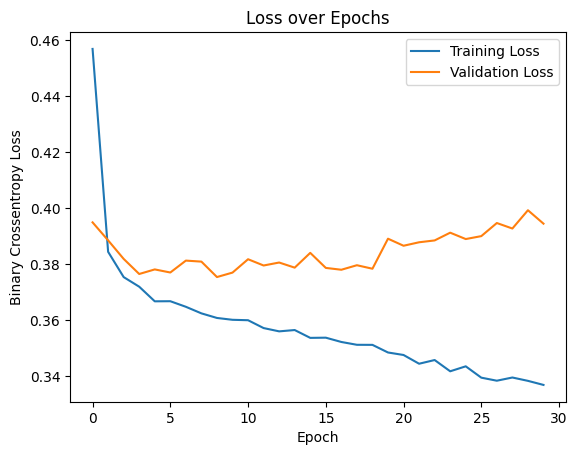

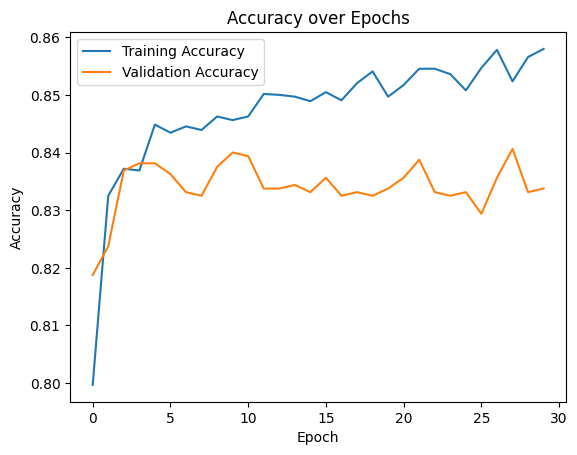

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

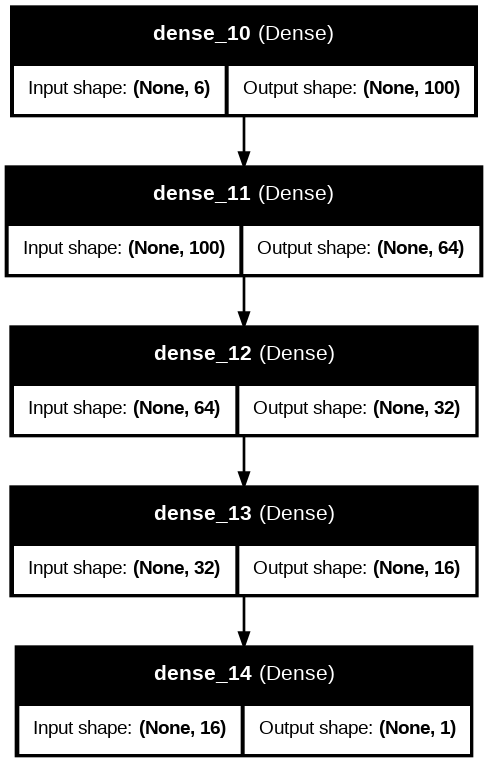

In [ ]:
!pip install pydot graphviz

from IPython.display import display, Image
import tempfile
import tensorflow as tf

with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as tmpfile:
    tf.keras.utils.plot_model(
        model,
        to_file=tmpfile.name,
        show_shapes=True,
        show_layer_names=True,
        rankdir="TB",
        dpi=96
    )
    image_path = tmpfile.name

display(Image(filename=image_path, width=400))
